In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


In [128]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [129]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [130]:
df.shape

(962, 2)

In [131]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [132]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

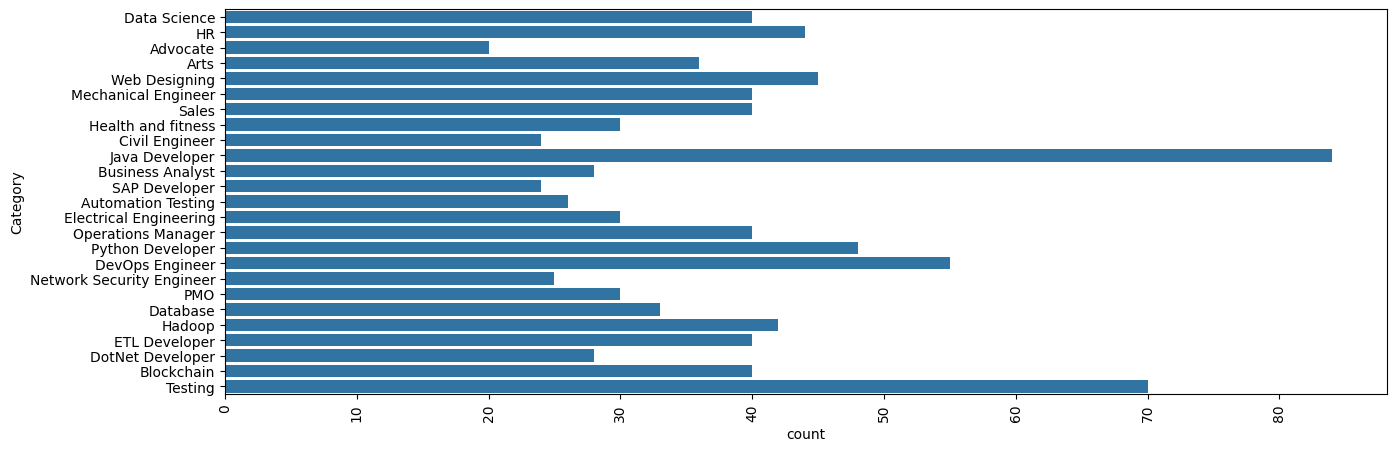

In [133]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [134]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [135]:
labels=df['Category'].unique()
counts=df['Category'].value_counts()

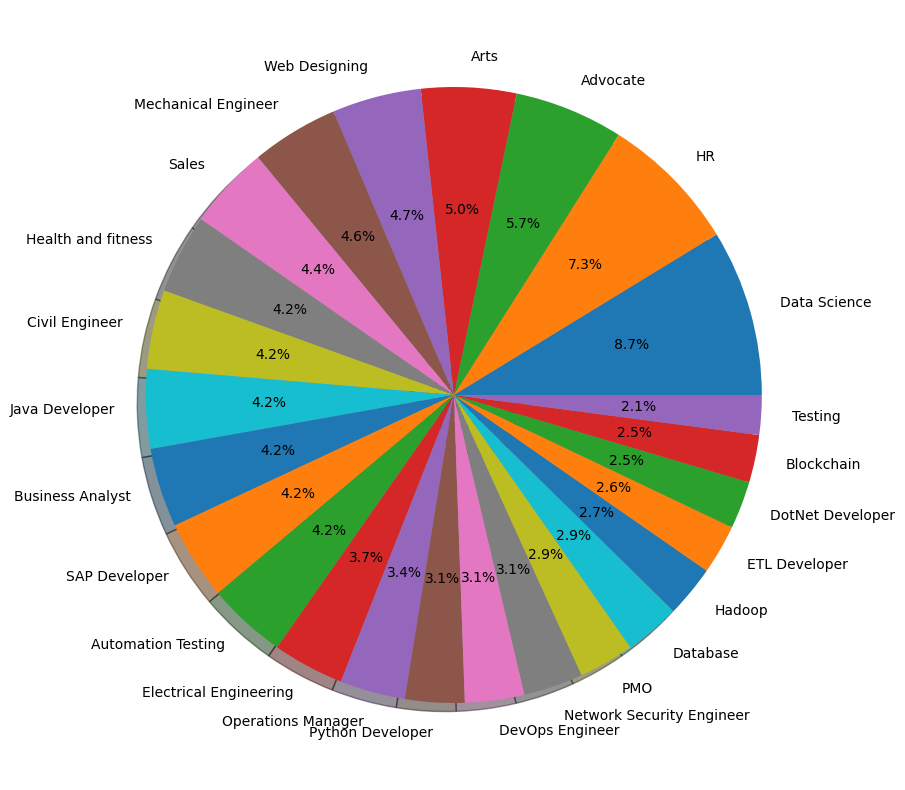

In [136]:
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

In [137]:
df['Category'][0]

'Data Science'

Cleaning the resume

In [138]:
import re

In [139]:
def cleanResume(txt):
    cleanText=re.sub(r'http\S+\s','        ',txt)
    cleanText=re.sub(r'@\S+','        ',cleanText)
    cleanText=re.sub(r'#\S+','        ',cleanText)
    cleanText=re.sub(r'\b(RT|cc)\b' ,'           ' ,cleanText)
    # cleanTxt=re.sub(r'[%s]' %re.escape(""" !"#$%&'*+,./<=>?@[\\]^_{i}~"""), '  ', cleanText)
    special_chars = """ !"#$%&'*+,./<=>?@[\\]^_{}~"""
    cleanText = re.sub(r'[%s]' % re.escape(special_chars), ' ', cleanText)
    cleanText=re.sub(r'[^\x06-\x7f]','  ' ,cleanText)

    cleanText=re.sub(r'\s+', ' ' ,cleanText)

    
    

    return cleanText

In [140]:
cleanResume("Hello! How are you @user? Visit: http://test.com [Done]")

'Hello How are you Visit: Done '

In [141]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [142]:
df['Resume'][0]

'Skills Programming Languages: Python (pandas numpy scipy scikit-learn matplotlib) Sql Java JavaScript JQuery Machine learning: Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling (LDA NMF) PCA Neural Nets Database Visualizations: Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others: Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision - Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate - Ernst Young LLP Skill Details JAVASCRIPT- Exprience - 24 months jQuery- Exprience - 24 months Python- Exprience - 24 monthsCompany Details company - Ernst Young LLP description - Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR (Technology Assisted Review) 

In [143]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [144]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [145]:
df['Category'].unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

Vectorization

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
tfidf=TfidfVectorizer(stop_words='english')

In [148]:
tfidf.fit(df['Resume'])
requiredText=tfidf.transform(df['Resume'])

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [151]:
X_train.shape

(769, 7347)

In [152]:
X_test.shape

(193, 7347)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [154]:
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [155]:
import pickle

In [156]:
pickle.dump(tfidf,open('tfidfd.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

Predication system

In [157]:
tfidf = pickle.load(open('tfidfd.pkl', 'rb'))
svc_model = pickle.load(open('clf.pkl', 'rb'))

In [158]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name


In [159]:
# def extract_info(resume_text):
#     # Keep the raw text for better extraction
#     lines = resume_text.strip().split('\n')


#     email_match = re.findall(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}", resume_text)
#     email = email_match[0] if email_match else None


#     phone_match = re.findall(r'\+?\d[\d\s()-]{8,}\d', resume_text)
#     phone = phone_match[0] if phone_match else None

#     # Extract name: Search for a line with capitalized words like "NOOR SAEED"
#     name = None
#     for line in lines:
#         if line.strip() and line.strip().isupper() and len(line.strip().split()) <= 4:
#             name = line.strip().title()
#             break

#     # Skills extraction (match keywords in lowercase)
#     skill_keywords = ['python', 'java', 'machine learning', 'deep learning', 'sql', 'tensorflow', 'pytorch',
#                       'html', 'css', 'flask', 'react', 'c++', 'data science', 'sklearn', 'data visualization']
#     found_skills = []
#     for skill in skill_keywords:
#         if re.search(r'\b' + re.escape(skill) + r'\b', resume_text.lower()):
#             found_skills.append(skill.title())

#     # Education: look for lines with degrees
#     edu_keywords = ['bachelor', 'master', 'b.sc', 'm.sc', 'ph.d', 'btech', 'be', 'mtech', 'degree']
#     education = []
#     for line in lines:
#         if any(keyword in line.lower() for keyword in edu_keywords):
#             year_match = re.search(r'\b(20\d{2}|19\d{2})\b', line)
#             education.append({
#                 "degree": line.strip(),
#                 "institute": "",  # Optional
#                 "year": year_match.group() if year_match else ""
#             })

#     # Experience: look for lines with keywords
#     exp_keywords = ['intern', 'engineer', 'developer', 'manager', 'data scientist', 'trainer', 'coach']
#     experience = []
#     for line in lines:
#         if any(role in line.lower() for role in exp_keywords):
#             duration_match = re.search(r'(\b(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)[a-z]*\s?\d{4})\s?-\s?(?:\b(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)?[a-z]*\s?\d{4})?', line.lower())
#             experience.append({
#                 "title": line.strip(),
#                 "company": "",
#                 "duration": duration_match.group() if duration_match else ""
#             })

#     return {
#         "name": name,
#         "email": email,
#         "phone": phone,
#         "skills": found_skills,
#         "education": education,
#         "experience": experience
#     }


In [258]:
import re
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define skill keywords
CATEGORY_SKILL_KEYWORDS = {
    "Programmer": [
        'python', 'java', 'c++', 'sql', 'html', 'css', 'javascript',
        'machine learning', 'deep learning', 'data analysis',
        'tensorflow', 'pytorch', 'flask', 'django', 'react',
        'excel', 'powerbi', 'tableau', 'linux', 'git', 'docker'
    ],
    "Advocate": [
        'criminal law', 'civil litigation', 'family law', 'contract law',
        'legal research', 'legal writing', 'courtroom advocacy',
        'legal counseling', 'negotiation', 'settlement',
        'client relationship management', 'compliance', 'regulations'
    ],
    "Healthcare": [
        'patient care', 'clinical procedures', 'emr', 'ehr', 'medical terminology',
        'vital signs monitoring', 'phlebotomy', 'healthcare compliance',
        'diagnosis', 'treatment planning', 'nutrition', 'fitness coaching',
        'rehabilitation', 'first aid', 'nursing'
    ]
}


def extract_info_spacy(resume_text):
    doc = nlp(resume_text)

    # --- Extract Email ---
    email_match = re.findall(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}", resume_text)
    email = email_match[0] if email_match else None

    # --- Extract Phone ---
    phone_match = re.findall(r'\+?\d[\d\s()-]{8,}\d', resume_text)
    phone = phone_match[0] if phone_match else None

    # --- Extract Name (First PERSON Entity or Capital Line) ---
    name = None
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            name = ent.text.strip().title()
            break
    if not name:
        for line in resume_text.split('\n'):
            if line.strip().isupper() and 1 <= len(line.strip().split()) <= 4:
                name = line.strip().title()
                break

  # --- Extract Skills ---
    found_skills = []
    text_lower = " ".join(resume_text.lower().split())  # Flatten to avoid \n issues
    for skill in SKILL_KEYWORDS:
        if re.search(r'\b' + re.escape(skill) + r'\b', text_lower):
            found_skills.append(skill.title())


        
    # --- Extract Organizations and Education Keywords ---
    education = []
    experience = []
    for ent in doc.ents:
        if ent.label_ == "ORG":
            org = ent.text.strip()
            # Heuristic: if sentence has 'university' or 'college' => education
            if any(word in org.lower() for word in ['university', 'college', 'institute']):
                education.append(org)
            else:
                experience.append(org)

    # --- Extract Dates ---
    dates = [ent.text for ent in doc.ents if ent.label_ == "DATE"]
    return {
        "name": name,
        "email": email,
        "phone": phone,
        "skills": list(set(found_skills)),
        "education": list(set(education)),
        "experience": list(set(experience)),
        "dates": dates
    }


In [272]:
myresume = """I am Noor Saeed.I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'

In [273]:
print("The category of the resume is : ",pred(myresume))
print()

print("The information extrated are: ")
result = extract_info_spacy(myresume)
print(json.dumps(result, indent=2))

The category of the resume is :  Data Science

The information extrated are: 
{
  "name": "Noor Saeed",
  "email": "611noorsaeed@gmail.com",
  "phone": "03442826192",
  "skills": [
    "Sklearn",
    "Pytorch",
    "Sql",
    "Tensorflow",
    "Deep Learning",
    "Python",
    "Machine Learning",
    "Excel"
  ],
  "education": [],
  "experience": [
    "Contact & Sources",
    "PyTorch",
    "SQL",
    "TensorFlow",
    "Data Preprocessing and Feature Engineering"
  ],
  "dates": []
}


In [265]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Contact & Sources
Email: 6554janmesmith@gmail.com
Phone: 0565556565

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)


Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'

In [270]:
print("The category of the resume is : ",pred(myresume))
print()

print("The information extrated are: ")
result = extract_info_spacy(myresume)
print(json.dumps(result, indent=2))

The category of the resume is :  Health and fitness

The information extrated are: 
{
  "name": "Jane Smith",
  "email": "6554janmesmith@gmail.com",
  "phone": "0565556565",
  "skills": [],
  "education": [
    "ABC University"
  ],
  "experience": [
    "XYZ Fitness Gym",
    "First Aid Certified\n- Yoga Instructor",
    "the National Academy of Sports Medicine",
    "NASM",
    "Wellness Center"
  ],
  "dates": [
    "over 5 years",
    "2014-2018",
    "2018-Present",
    "2016-2018"
  ]
}


In [253]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

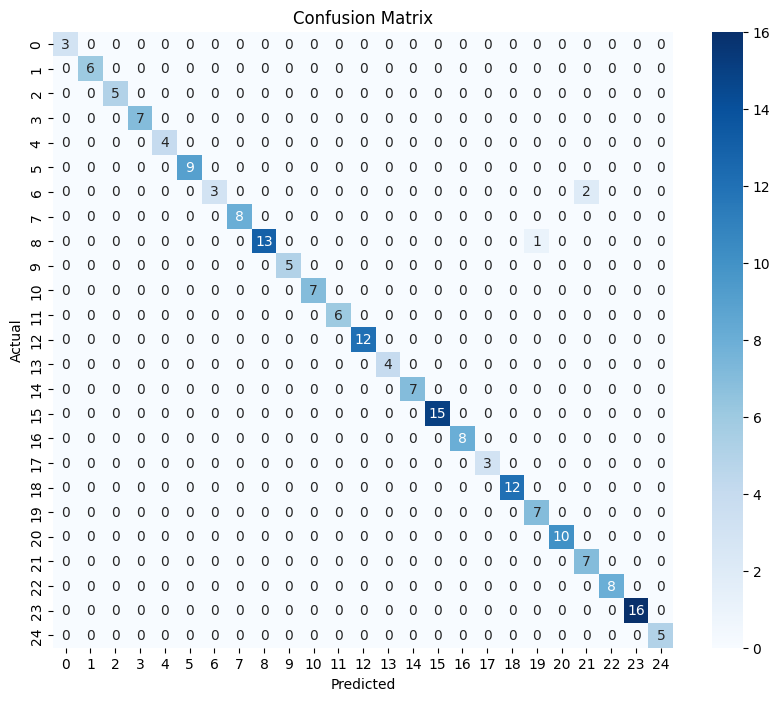

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

In [104]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = clf.predict(X_test)

# No need for argmax if labels are already single integers
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Optional classification metrics
print(classification_report(y_test, y_pred))


In [114]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round values
report_df = report_df.round(2)

# Display as a table 
report_df  


,precision,recall,f1-score,support
0,1.00,1.00,1.00,3.00
1,1.00,1.00,1.00,6.00
2,1.00,1.00,1.00,5.00
3,1.00,1.00,1.00,7.00
4,1.00,1.00,1.00,4.00
5,1.00,1.00,1.00,9.00
6,1.00,0.60,0.75,5.00
7,1.00,1.00,1.00,8.00
8,1.00,0.93,0.96,14.00
9,1.00,1.00,1.00,5.00
